<a href="https://colab.research.google.com/github/springboardmentor2468a-lab/Projects/blob/Divyadharshini-R/task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK1**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns             #importing necessary libraries
import numpy as np
df=pd.read_csv("/content/Indian_Kids_Screen_Time.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9712 entries, 0 to 9711
Data columns (total 8 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                9712 non-null   int64  
 1   Gender                             9712 non-null   object 
 2   Avg_Daily_Screen_Time_hr           9712 non-null   float64
 3   Primary_Device                     9712 non-null   object 
 4   Exceeded_Recommended_Limit         9712 non-null   bool   
 5   Educational_to_Recreational_Ratio  9712 non-null   float64
 6   Health_Impacts                     6494 non-null   object 
 7   Urban_or_Rural                     9712 non-null   object 
dtypes: bool(1), float64(2), int64(1), object(4)
memory usage: 540.7+ KB


In [ ]:
df.head()    #display first 5 lines

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban
3,15,Female,1.21,Laptop,False,0.39,NaN,Urban
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban


In [ ]:
df.isnull().sum()   #checking for null values

,0
Age,0
Gender,0
Avg_Daily_Screen_Time_hr,0
Primary_Device,0
Exceeded_Recommended_Limit,0
Educational_to_Recreational_Ratio,0
Health_Impacts,3218
Urban_or_Rural,0


In [ ]:
print("number of duplicates")   #checking for duplicate values
df.duplicated().sum()

number of duplicates


np.int64(44)

In [ ]:
print("statistical measures")  #statistical measures
df.describe()

statistical measures


,Age,Avg_Daily_Screen_Time_hr,Educational_to_Recreational_Ratio
count,9712.000000,9712.000000,9712.000000
mean,12.979201,4.352837,0.427226
std,3.162437,1.718232,0.073221
min,8.000000,0.000000,0.300000
25%,10.000000,3.410000,0.370000
50%,13.000000,4.440000,0.430000
75%,16.000000,5.380000,0.480000
max,18.000000,13.890000,0.600000


In [ ]:
df.duplicated() #chechking duplicates

,0
0,False
1,False
2,False
3,False
4,False
...,...
9707,False
9708,False
9709,False
9710,False


In [ ]:
corr=df.corr(numeric_only=True)   #correlation for entire data
print(corr)


                                        Age  Avg_Daily_Screen_Time_hr  \
Age                                1.000000                  0.118328   
Avg_Daily_Screen_Time_hr           0.118328                  1.000000   
Exceeded_Recommended_Limit         0.159173                  0.664950   
Educational_to_Recreational_Ratio -0.488617                 -0.087552   

                                   Exceeded_Recommended_Limit  \
Age                                                  0.159173   
Avg_Daily_Screen_Time_hr                             0.664950   
Exceeded_Recommended_Limit                           1.000000   
Educational_to_Recreational_Ratio                   -0.126643   

                                   Educational_to_Recreational_Ratio  
Age                                                        -0.488617  
Avg_Daily_Screen_Time_hr                                   -0.087552  
Exceeded_Recommended_Limit                                 -0.126643  
Educational_to_Recreatio

In [ ]:
Q1 = df['Avg_Daily_Screen_Time_hr'].quantile(0.25)     #remove outliers
Q3 = df['Avg_Daily_Screen_Time_hr'].quantile(0.75)
IQR = Q3 - Q1
print("IQR:", IQR)


IQR: 1.9699999999999998


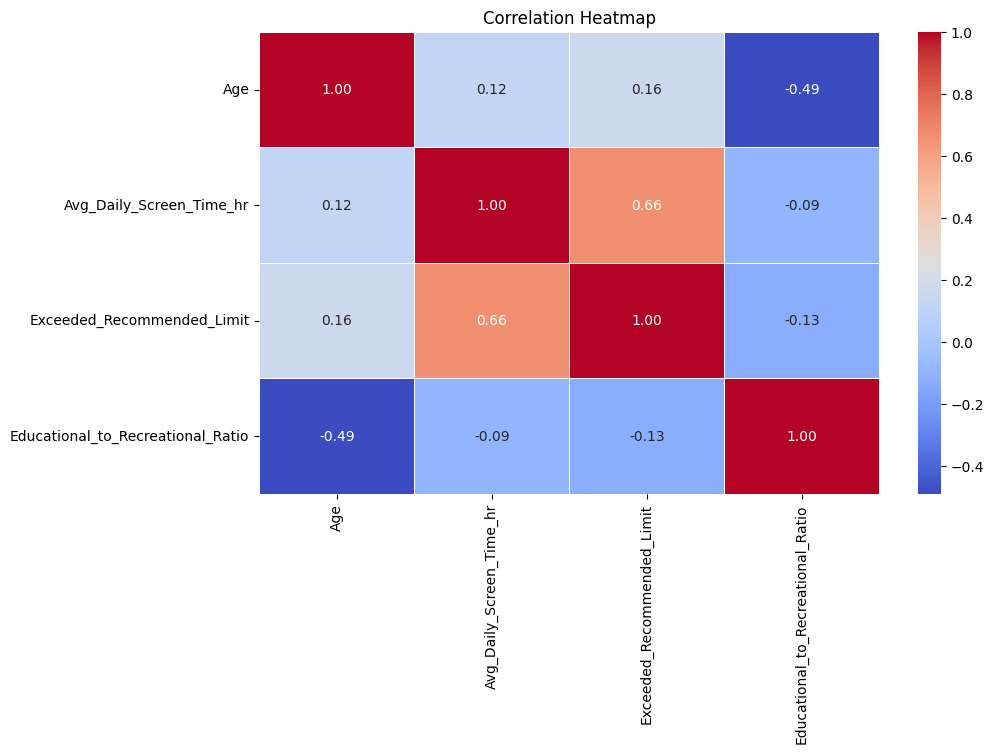

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

**summary**:

1.   importing necessary libraries
2.   load the dataset
3.   view datatype using info()
4.   checking null values
5.   view statistical measures
6.   checking duplicates
7.   finding correlation
8.   IQR for outliers
9.   heatmap for correlation

## **WEEK2**

In [3]:
#Create Age Bands
import pandas as pd
df=pd.read_csv("/content/Indian_Kids_Screen_Time.csv")
age_bins = [7, 10, 14, 18]
age_labels = ['Child', 'Pre-Teen', 'Teenager']
df['Age_Band'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
print(df[['Age','Age_Band']])

      Age  Age_Band
0      14  Pre-Teen
1      11  Pre-Teen
2      18  Teenager
3      15  Teenager
4      12  Pre-Teen
...   ...       ...
9707   17  Teenager
9708   17  Teenager
9709   16  Teenager
9710   17  Teenager
9711   15  Teenager

[9712 rows x 2 columns]


In [9]:
# Identifying the columns with missing values
missing_cols = df.columns[df.isnull().any()]
print("Columns with missing values:", list(missing_cols))

Columns with missing values: ['Health_Impacts']


In [10]:
#As the None values are converted null when checking for null values,
#then nan values will become 3180 as there are no real null values
none_count = (df['Health_Impacts'] == 'None').sum()
print("Number of 'None' string values:", none_count)
nan_count = df['Health_Impacts'].isnull().sum()
print("Number of real NaN values:", nan_count)


Number of 'None' string values: 0
Number of real NaN values: 3218


In [13]:
#  Replace 'None' strings with NaN
df['Health_Impacts'] = df['Health_Impacts'].replace('None', pd.NA)

# Fill all NaN values with 'No Impacts'
df['Health_Impacts'] = df['Health_Impacts'].fillna('No Health Impacts')

In [15]:
# Verifying if the missing values are handled
print("\nMissing values after replacement:\n", df.isnull().sum())


Missing values after replacement:
 Age                                  0
Gender                               0
Avg_Daily_Screen_Time_hr             0
Primary_Device                       0
Exceeded_Recommended_Limit           0
Educational_to_Recreational_Ratio    0
Health_Impacts                       0
Urban_or_Rural                       0
Age_Band                             0
dtype: int64


In [18]:
# Define keywords
physical_keywords = ['sleep', 'eye', 'posture', 'obesity', 'fatigue', 'vision', 'weight']
mental_keywords = ['stress', 'anxiety', 'depression', 'addiction', 'behavior', 'emotional']

# Function to extract full phrases around each keyword
def extract_full_phrases(text, keywords):
    text = str(text).lower()
    import re
    parts = re.split(r'[;,]| and ', text)

    found = []
    for part in parts:
        for kw in keywords:
            if kw in part:
                cleaned = part.strip()
                if cleaned not in found:
                    found.append(cleaned)

    return ', '.join(found) if found else 'No Impact'

# Apply to dataset
df['Physical_Health'] = df['Health_Impacts'].apply(lambda x: extract_full_phrases(x, physical_keywords))
df['Mental_Health'] = df['Health_Impacts'].apply(lambda x: extract_full_phrases(x, mental_keywords))

# Verify the new column
print(df[['Health_Impacts', 'Physical_Health', 'Mental_Health']].head(10))

             Health_Impacts           Physical_Health Mental_Health
0    Poor Sleep, Eye Strain    poor sleep, eye strain     No Impact
1                Poor Sleep                poor sleep     No Impact
2                Poor Sleep                poor sleep     No Impact
3         No Health Impacts                 No Impact     No Impact
4       Poor Sleep, Anxiety                poor sleep       anxiety
5                Poor Sleep                poor sleep     No Impact
6         No Health Impacts                 No Impact     No Impact
7         No Health Impacts                 No Impact     No Impact
8       Poor Sleep, Anxiety                poor sleep       anxiety
9  Poor Sleep, Obesity Risk  poor sleep, obesity risk     No Impact


In [19]:
print(df["Primary_Device"].unique())

# Create Screen_Size based on Primary_Device actual values
def assign_screen_size(Primary_device):
    if Primary_device in ["TV"]:   # wallmounted
        return ">=30\""
    elif Primary_device in ["Smartphone", "Laptop", "Tablet"]:  # portable
        return "<30\""
    else:
        return "Unknown"

df["Screen_Size"] = df["Primary_Device"].apply(assign_screen_size)
#Verifying if the Column is created
print(df[['Primary_Device', 'Screen_Size']].head(10))

['Smartphone' 'Laptop' 'TV' 'Tablet']
  Primary_Device Screen_Size
0     Smartphone        <30"
1         Laptop        <30"
2             TV       >=30"
3         Laptop        <30"
4     Smartphone        <30"
5     Smartphone        <30"
6             TV       >=30"
7             TV       >=30"
8         Laptop        <30"
9         Tablet        <30"


In [21]:
#Create a new column by categorizing Screen Time
def categorize_screen_time(hours):
    if hours < 2:
        return "Low"
    elif 2 <= hours <= 4:
        return "Medium"
    else:
        return "High"

df["Screen_Time_Category"] = df["Avg_Daily_Screen_Time_hr"].apply(categorize_screen_time)
#verify if the new column is created
print(df[['Avg_Daily_Screen_Time_hr', 'Screen_Time_Category']].head(10))

   Avg_Daily_Screen_Time_hr Screen_Time_Category
0                      3.99               Medium
1                      4.61                 High
2                      3.73               Medium
3                      1.21                  Low
4                      5.89                 High
5                      4.88                 High
6                      2.97               Medium
7                      2.74               Medium
8                      4.61                 High
9                      3.24               Medium


In [22]:
# Saving the updated dataset in a CSV file
df.to_csv("Cleaned_Dataset.csv", index=False)
print("\n The Cleaned Dataset is saved as 'Cleaned_Dataset.csv'")


 The Cleaned Dataset is saved as 'Cleaned_Dataset.csv'


In [23]:
df.head(20)

,Age,Gender,Avg_Daily_Screen_Time_hr,Primary_Device,Exceeded_Recommended_Limit,Educational_to_Recreational_Ratio,Health_Impacts,Urban_or_Rural,Age_Band,Physical_Health,Mental_Health,Screen_Size,Screen_Time_Category
0,14,Male,3.99,Smartphone,True,0.42,"Poor Sleep, Eye Strain",Urban,Pre-Teen,"poor sleep, eye strain",No Impact,"<30""",Medium
1,11,Female,4.61,Laptop,True,0.30,Poor Sleep,Urban,Pre-Teen,poor sleep,No Impact,"<30""",High
2,18,Female,3.73,TV,True,0.32,Poor Sleep,Urban,Teenager,poor sleep,No Impact,">=30""",Medium
3,15,Female,1.21,Laptop,False,0.39,No Health Impacts,Urban,Teenager,No Impact,No Impact,"<30""",Low
4,12,Female,5.89,Smartphone,True,0.49,"Poor Sleep, Anxiety",Urban,Pre-Teen,poor sleep,anxiety,"<30""",High
5,14,Female,4.88,Smartphone,True,0.44,Poor Sleep,Urban,Pre-Teen,poor sleep,No Impact,"<30""",High
6,17,Male,2.97,TV,False,0.48,No Health Impacts,Rural,Teenager,No Impact,No Impact,">=30""",Medium
7,10,Male,2.74,TV,True,0.54,No Health Impacts,Urban,Child,No Impact,No Impact,">=30""",Medium
8,14,Male,4.61,Laptop,True,0.36,"Poor Sleep, Anxiety",Rural,Pre-Teen,poor sleep,anxiety,"<30""",High
9,18,Male,3.24,Tablet,True,0.48,"Poor Sleep, Obesity Risk",Urban,Teenager,"poor sleep, obesity risk",No Impact,"<30""",Medium


### **Summary**

Created a new Column called Age_band By grouping the Ages in the dataset.

The  missing values in the Health_Impacts column were stored as 'None' (text) instead of actual nulls.

Replaced these NaN values with the label **"No Health Impacts"** to clearly indicate no health effects.

Health_Impacts column are splitted into Physical_Health and Mental_Health where most people are affected with physical health rather than Mental health.

We checks each student’s primary device and assigns a screen size category where more children uses Portable devices frequently.

This code categorizes each child’s average daily screen time into three groups: Low (<2 hrs), Medium (2–4 hrs), and High (>4 hrs).Most children uses the Devices more than 4 hours.

Saved the cleaned dataset for further analysis and modeling.
